In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sample_prediction = pd.read_csv("sample_prediction_dataset.csv")

In [3]:
sample_prediction

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,1
27997,27998,0
27998,27999,0


In [4]:
test_data = pd.read_csv("test_data.csv")

In [5]:
test_data

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [6]:
train_data = pd.read_csv("training_data.csv")

In [7]:
train_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [8]:
#sınıf frekansları
import researchpy as rp
rp.summary_cat(train_data[["Risk_Flag","Married/Single","House_Ownership","Car_Ownership","Profession"]])

,Variable,Outcome,Count,Percent
0,Risk_Flag,0,221004,87.70
1,,1,30996,12.30
2,Married/Single,single,226272,89.79
3,,married,25728,10.21
4,House_Ownership,rented,231898,92.02
5,,owned,12918,5.13
6,,norent_noown,7184,2.85
7,Car_Ownership,no,176000,69.84
8,,yes,76000,30.16
9,Profession,Physician,5957,2.36


In [9]:
#hedef değişken risk flag dengesizlik var bu sebeple class_weight kullanılacak

In [10]:
train_data.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


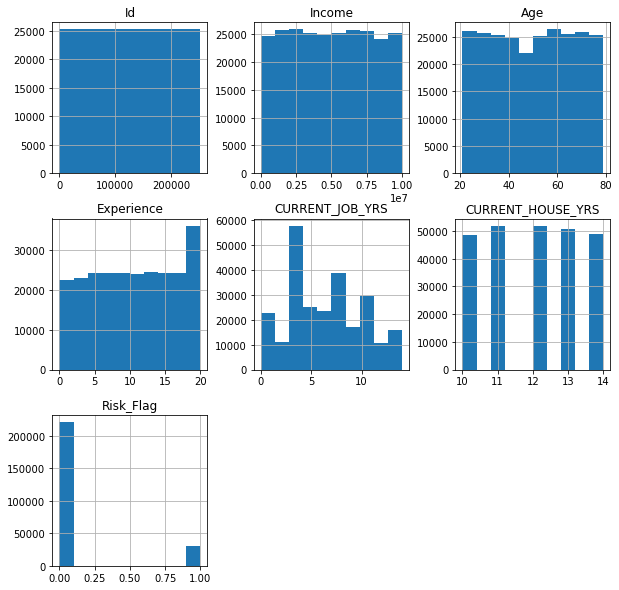

In [11]:
train_data.hist(figsize = (10,10));

In [12]:
train_data.groupby("Risk_Flag")["Income"].value_counts()

Risk_Flag  Income 
0          7936020    77
           1996629    71
           9775375    71
           9345456    70
           44231      40
                      ..
1          9986330     1
           9987805     1
           9987812     1
           9987955     1
           9994501     1
Name: Income, Length: 43126, dtype: int64

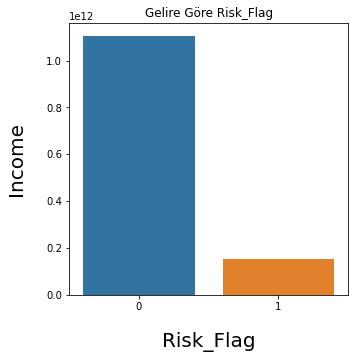

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
income = train_data.groupby("Risk_Flag")["Income"].sum().sort_values(ascending = False)
income_df = pd.DataFrame(list(income.items()), columns=['Risk_Flag', 'Income'])
plt.figure(figsize=(5,5))
plt.title('Gelire Göre Risk_Flag')
sns.barplot(data=income_df, x='Risk_Flag', y='Income');
plt.xlabel('Risk_Flag', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

In [14]:
train_data["House_Ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [15]:
train_data.groupby("Risk_Flag")["House_Ownership"].value_counts()

Risk_Flag  House_Ownership
0          rented             202777
           owned               11758
           norent_noown         6469
1          rented              29121
           owned                1160
           norent_noown          715
Name: House_Ownership, dtype: int64

In [16]:
train_data.groupby("Risk_Flag")["Married/Single"].value_counts()

Risk_Flag  Married/Single
0          single            197912
           married            23092
1          single             28360
           married             2636
Name: Married/Single, dtype: int64

In [17]:
#LGBM ile model oluşturalım

In [18]:
train_data.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [19]:
train_data.index = train_data["Id"]
train_data = train_data.drop("Id", axis = 1)

In [20]:
test_data.dtypes

ID                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
dtype: object

In [21]:
test_data.index = test_data["ID"]
test_data = test_data.drop("ID", axis = 1)

In [22]:
from sklearn import preprocessing
lbe=preprocessing.LabelEncoder()
train_data["Married/Single"] = lbe.fit_transform(train_data["Married/Single"])
train_data["House_Ownership"] = lbe.fit_transform(train_data["House_Ownership"])
train_data["Car_Ownership"] = lbe.fit_transform(train_data["Car_Ownership"])
train_data["Profession"] = lbe.fit_transform(train_data["Profession"])
train_data["CITY"] = lbe.fit_transform(train_data["CITY"])
train_data["STATE"] = lbe.fit_transform(train_data["STATE"])

In [23]:
lbe=preprocessing.LabelEncoder()
test_data["Married/Single"] = lbe.fit_transform(test_data["Married/Single"])
test_data["House_Ownership"] = lbe.fit_transform(test_data["House_Ownership"])
test_data["Car_Ownership"] = lbe.fit_transform(test_data["Car_Ownership"])
test_data["Profession"] = lbe.fit_transform(test_data["Profession"])
test_data["CITY"] = lbe.fit_transform(test_data["CITY"])
test_data["STATE"] = lbe.fit_transform(test_data["STATE"])

In [24]:
y_test = sample_prediction["risk_flag"]
y_train = train_data["Risk_Flag"]
X_train = train_data.drop("Risk_Flag", axis = 1)
X_test = test_data

In [25]:
y_test

0        0
1        0
2        1
3        0
4        0
        ..
27995    0
27996    1
27997    0
27998    0
27999    0
Name: risk_flag, Length: 28000, dtype: int64

In [26]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [28]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.86875

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     24407
           1       0.12      0.00      0.01      3593

    accuracy                           0.87     28000
   macro avg       0.50      0.50      0.47     28000
weighted avg       0.78      0.87      0.81     28000



In [30]:
#f1 skorunda 1 tahminlerinin değeri düşük daha iyi sonuç elde edebilmek amacı ile class_weight = "balanced" kullanacağız
lgbm_model

LGBMClassifier()

In [31]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [32]:
lgbm = LGBMClassifier(class_weight = 'balanced')

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 4, 
                             n_jobs = -1, 
                             verbose = 2)

In [33]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


GridSearchCV(cv=4, estimator=LGBMClassifier(class_weight='balanced'), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [34]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 10,
 'n_estimators': 2000,
 'subsample': 0.6}

In [35]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 6,
                       subsample = 0.6,
                       n_estimators = 2000,
                       min_child_samples = 10)

In [36]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [37]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7949642857142857

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     24407
           1       0.12      0.09      0.10      3593

    accuracy                           0.79     28000
   macro avg       0.49      0.50      0.49     28000
weighted avg       0.77      0.79      0.78     28000



In [39]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

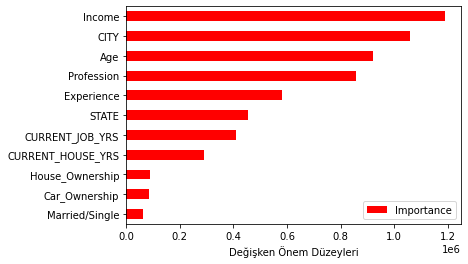

In [40]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")